&nbsp;
&nbsp;
![](../_resources/images/e2eai-4.jpg)

# EDA (Exploratory Data Analysis)
Understanding your data is the first step to building an ML model.  While advanced AI models may have some understanding of your data without training or prompting, it's important for the humans in a solution to know how clean the data is and what it looks like.  This notebook gives a small sample of data exploration.

After review of this notebook, notice that the column `abnormal_sensor` indicates if a sensor is not performing within specification.  This is an example of something we could try to predict. 

In [0]:
%run ../_resources/00-setup $reset_all_data=false

## Configuration file

Please change your catalog and schema here to run the demo on a different catalog.

 
<!-- Collect usage data (view). Remove it to disable collection. View README for more details.  -->
<img width="1px" src="https://ppxrzfxige.execute-api.us-west-2.amazonaws.com/v1/analytics?category=lakehouse&org_id=4003492105941350&notebook=%2Fconfig&demo_name=lakehouse-iot-platform&event=VIEW&path=%2F_dbdemos%2Flakehouse%2Flakehouse-iot-platform%2Fconfig&version=1">


# Technical Setup notebook. Hide this cell results
Initialize dataset to the current user and cleanup data when reset_all_data is set to true

Do not edit

USE CATALOG `main`
using catalog.database `main`.`e2eai_iot_turbine`


data already existing. Run with reset_all_data=true to force a data cleanup for your local demo.


In [0]:
import seaborn as sns
import numpy as np
import pandas as pd


## Data exploration and analysis

Let's review our dataset and start analyze the data we have to predict our churn

In [0]:
def plot(sensor_report):
  turbine_id = spark.table('turbine_training_dataset').where(f"abnormal_sensor = '{sensor_report}' ").limit(1).collect()[0]['turbine_id']
  #Let's explore a bit our datasets with pandas on spark.
  df = spark.table('sensor_bronze').where(f"turbine_id == '{turbine_id}' ").orderBy('timestamp').limit(500).pandas_api()
  df.plot(x="timestamp", y=["sensor_B"], kind="line", title=f'Sensor report: {sensor_report}').show()
plot('ok')

Tried to attach usage logger `pyspark.databricks.pandas.usage_logger`, but an exception was raised: JVM wasn't initialised. Did you call it on executor side?


In [0]:
plot('sensor_B')

As we can see in these graph, we can see some anomaly on the readings we get from sensor F. Let's continue our exploration and use the std we computed in our main feature table.


In [0]:
# Read our churn_features table
turbine_dataset = spark.table('turbine_training_dataset').withColumn('damaged', col('abnormal_sensor') != 'ok')
display(turbine_dataset.limit(20))

composite_key,sensor_vector,hourly_timestamp,avg_energy,std_sensor_A,std_sensor_B,std_sensor_C,std_sensor_D,std_sensor_E,std_sensor_F,percentiles_sensor_A,percentiles_sensor_B,percentiles_sensor_C,percentiles_sensor_D,percentiles_sensor_E,percentiles_sensor_F,country,lat,location,long,model,state,abnormal_sensor,end_time,maintenance_report,start_time,turbine_id,damaged
1d601983-7dc4-b80c-9363-cac90a9dba81-1705423245,"List(1.0595382226941208, 2.0465027944192307, 3.115282852400196, 2.1910373750521352, 2.7347988714702853, 2.0434436450704068)",2024-01-16T21:00:00.000Z,1.8395264600848422,1.0595382226941208,2.0465027944192307,3.115282852400196,2.1910373750521352,2.7347988714702853,2.0434436450704068,"List(-2.2918560799686425, -1.568300913766198, -0.8034693030066752, -0.14696344941577155, 0.6825308630069225)","List(-3.3990955648939396, -1.88787754865703, -0.6067836030942388, 0.41187064693182407, 2.262746941488877)","List(-4.707632964987816, -2.525814670294703, -0.4943751783465342, 1.19710720706507, 3.314448515768259)","List(-3.1731233821557714, -1.6768390162076738, -0.012632872852230248, 1.3482011132011094, 3.490902896115712)","List(-3.7789847683847464, -1.6831377985751723, 0.34405948475002956, 2.2168739454212893, 4.063048003050868)","List(-2.935797862837059, -1.8231358899690924, -0.2714835276804981, 1.0873137263357728, 2.7598937529532233)",US,36.02506,Brentwood Estates,-86.77917,EpicWind,America/Chicago,ok,1708021088,null,1705423245,1d601983-7dc4-b80c-9363-cac90a9dba81,false
06e82a01-2b5c-5cd1-e7ca-430e92ac3d42-1705423885,"List(0.9568639358475702, 1.7911857754593554, 2.745167642571039, 2.4715645620127202, 1.9538779628395087, 1.942085505859875)",2024-01-16T23:00:00.000Z,0.31854078540918307,0.9568639358475702,1.7911857754593554,2.745167642571039,2.4715645620127202,1.9538779628395087,1.942085505859875,"List(-2.0361387700956213, -1.638569468178812, -0.708453039507799, 0.053499029191763636, 0.6398743972157439)","List(-3.8328971226224557, -1.9342724720385034, -0.22747966099419126, 0.5625168279462933, 1.2868486100017895)","List(-4.2144191680370895, -2.2463635143721215, 0.07070557116190246, 2.559472177574091, 3.49233343945546)","List(-3.330235146595165, -2.01272390185068, 0.3493856374362001, 1.9100347659873325, 4.22784337679596)","List(-2.0453869571959435, -0.28031035062150256, 1.2340605731000247, 2.4876329415115515, 3.5422527576143614)","List(-3.0925177828190975, -1.618488674993483, -0.6076949769441093, 1.1426733852043067, 2.880582401135456)",US,26.91756,Punta Gorda Isles,-82.07842,EpicWind,America/New_York,ok,1708017161,null,1705423885,06e82a01-2b5c-5cd1-e7ca-430e92ac3d42,false
a243aa64-0efe-8a33-7326-5e45e3663ca8-1705423485,"List(1.067928407017954, 2.0587646593870033, 2.9599672904509067, 2.1642297959439256, 2.3661853757773135, 3.782473734704931)",2024-01-16T17:00:00.000Z,0.20953699715692894,1.067928407017954,2.0587646593870033,2.9599672904509067,2.1642297959439256,2.3661853757773135,3.782473734704931,"List(-2.251670901705803, -1.5184953337798093, -0.7502739192689756, -0.1815373365236086, 0.8876122981160808)","List(-3.402502694333433, -1.8862354143404065, -0.31165925632216307, 0.8885423230271263, 2.2905147235010657)","List(-4.791064762990439, -2.5002112592170143, -0.31732973133408415, 1.2744412992149154, 3.9277872398083202)","List(-2.97973736488193, -1.4721043504427622, 0.16932523564422897, 1.3369883931366444, 3.768707707760383)","List(-1.746460852901823, -0.005009894800253933, 1.9292463981341816, 3.0912204536412338, 5.175254074177997)","List(-3.4599198373296467, -2.0797445454677144, 0.06339656045911846, 1.8623013750717734, 3.5991070937443235)",US,45.0408,Columbia Heights,-93.263,EpicWind,America/Chicago,sensor_F,1708019130,"Issue: Low rotor speed Root Cause: Malfunctioning wind sensor, inaccurate wind forecasting, or unfavorable wind conditions, resulting in suboptimal turbine performance and reduced energy production. Solution: Replace the faulty wind sensor with a new, calibrated unit and recalibrate the turbine control system to accur

Databricks visualization. Run in Databricks to view.

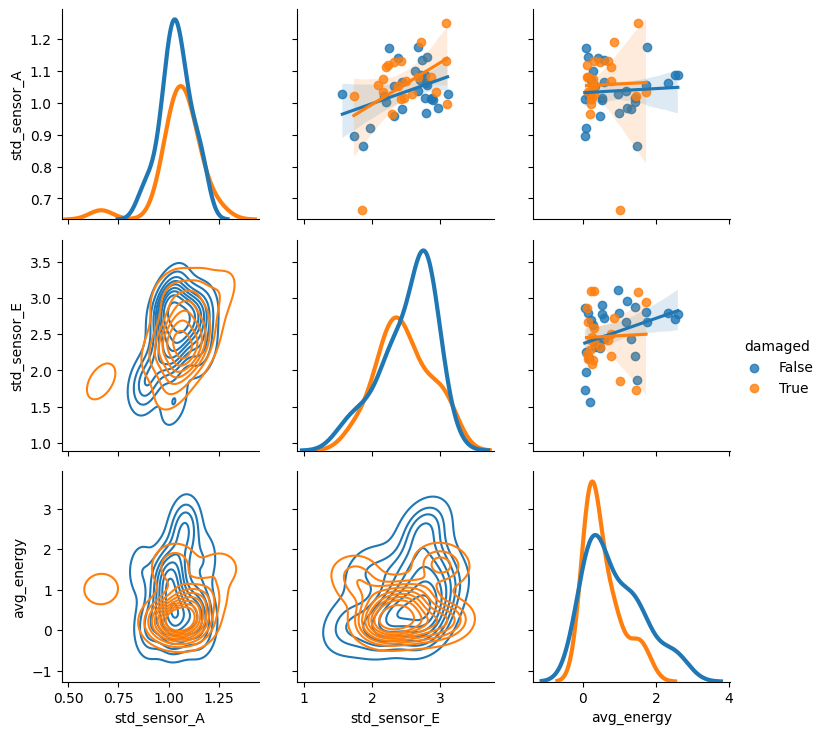

In [0]:

g = sns.PairGrid(turbine_dataset.sample(0.01).toPandas()[['std_sensor_A', 'std_sensor_E', 'damaged','avg_energy']], diag_sharey=False, hue="damaged")
g.map_lower(sns.kdeplot).map_diag(sns.kdeplot, lw=3).map_upper(sns.regplot).add_legend()

### Further data analysis and preparation using pandas API

Because our Data Scientist team is familiar with Pandas, we'll use `pandas on spark` to scale `pandas` code. The Pandas instructions will be converted in the spark engine under the hood and distributed at scale.

Typicaly Data Science project would involve more advanced preparation and likely require extra data prep step, including more complex feature preparation. We'll keep it simple for this demo.

*Note: Starting from `spark 3.2`, koalas is builtin and we can get an Pandas Dataframe using `pandas_api()`.*

In [0]:
 # Convert to pandas
dataset = turbine_dataset.pandas_api()

# Select the columns we would like to use as ML Model features. 
columns = [
    "turbine_id",
    "hourly_timestamp",
    "avg_energy",
    "std_sensor_A",
    "std_sensor_B",
    "std_sensor_C",
    "std_sensor_D",
    "std_sensor_E",
    "std_sensor_F",
    "location",
    "model",
    "state",
    "abnormal_sensor"
]
dataset = dataset[columns]

# Drop missing values
dataset = dataset.dropna()   
display(dataset.head(10))

turbine_id,hourly_timestamp,avg_energy,std_sensor_A,std_sensor_B,std_sensor_C,std_sensor_D,std_sensor_E,std_sensor_F,location,model,state,abnormal_sensor
1d601983-7dc4-b80c-9363-cac90a9dba81,2024-01-16T21:00:00.000Z,1.8395264600848422,1.0595382226941208,2.0465027944192307,3.115282852400196,2.1910373750521352,2.7347988714702853,2.0434436450704068,Brentwood Estates,EpicWind,America/Chicago,ok
06e82a01-2b5c-5cd1-e7ca-430e92ac3d42,2024-01-16T23:00:00.000Z,0.31854078540918307,0.9568639358475702,1.7911857754593554,2.745167642571039,2.4715645620127202,1.9538779628395087,1.942085505859875,Punta Gorda Isles,EpicWind,America/New_York,ok
a243aa64-0efe-8a33-7326-5e45e3663ca8,2024-01-16T17:00:00.000Z,0.20953699715692894,1.067928407017954,2.0587646593870033,2.9599672904509067,2.1642297959439256,2.3661853757773135,3.782473734704931,Columbia Heights,EpicWind,America/Chicago,sensor_F
aca129eb-c4ce-3b2e-809d-0048a10f47a9,2024-01-16T17:00:00.000Z,0.1280266831163152,1.0340557752068233,2.1188114562119766,3.3636869289552047,2.37944108424843,2.415843246694889,2.0662602526170124,Nampa,EpicWind,America/Boise,ok
d25dc699-142d-33ba-cccd-5c9a50c903f8,2024-01-16T21:00:00.000Z,1.5125201513182365,1.1208159453311903,2.3828227712926315,3.1866797063934125,2.278474787990343,3.0303688240132876,2.0099749798894253,San Gabriel,EpicWind,America/Los_Angeles,ok
be36172f-e363-586f-043d-9c170aa5c477,2024-01-16T21:00:00.000Z,0.18681915842161997,1.0408254078704915,2.274265368375408,2.9941436975325204,2.1987357432807038,2.7402513256659224,1.9843801951309934,Encinitas,EpicWind,America/Los_Angeles,ok
e295c5d0-bbee-de99-b374-9facecb8d19b,2024-01-16T23:00:00.000Z,0.6695014457760078,0.9050812079789594,2.0687943719436497,2.8696399549741867,3.2759983606111716,1.4943865924502724,2.0187750753164786,Greenfield,EpicWind,America/Indiana/Indianapolis,ok
998124ce-3f24-e641-7319-07bc819515cc,2024-01-16T17:00:00.000Z,0.2188697336775931,1.115268105287706,2.0142800334354964,3.2520977231849066,2.3927146074111802,2.5143423045865068,1.9818408690911378,Columbia Heights,EpicWind,America/Chicago,ok
570b75d3-2d04-8b2b-a3f8-9fd5d778369f,2024-01-16T23:00:00.000Z,0.08557330857738694,0.8774968658961547,2.4671582875634783,2.7933120753136076,4.0962742822484595,1.8046946011157161,1.7581098278192768,Chillum,EpicWind,America/New_York,sensor_D
81b36380-5397-8f06-4332-4539ac401e2a,2024-01-16T23:00:00.000Z,0.20564314894483451,0.936300482940005,4.289213318350757,2.8910234651455444,2.252807278632083,2.424936205101073,2.4258301495021395,Pottstown,EpicWind,America/New_York,sensor_B


In [0]:
spark.sql('drop table if exists turbine_hourly_features')

dataset.drop_duplicates(subset=['turbine_id', 'hourly_timestamp']).to_spark().write.saveAsTable(f'{catalog}.{db}.turbine_hourly_features')

In [0]:
df = spark.table(f'{catalog}.{db}.turbine_hourly_features')
display(df)

turbine_id,hourly_timestamp,avg_energy,std_sensor_A,std_sensor_B,std_sensor_C,std_sensor_D,std_sensor_E,std_sensor_F,location,model,state,abnormal_sensor
004a641f-e9e5-9fff-d421-1bf88319420b,2024-01-16T17:00:00.000Z,0.18897920400916973,0.9644652043128558,2.6558386572409103,3.4528106013576214,2.485158752607405,2.2884032468369284,4.702138990110717,Tupelo,EpicWind,America/Chicago,sensor_F
004a641f-e9e5-9fff-d421-1bf88319420b,2024-01-16T18:00:00.000Z,0.19212257629921775,1.0681855556261903,2.3848184303882847,3.303412042721332,2.172251292324001,2.342593019596896,4.870875418724548,Tupelo,EpicWind,America/Chicago,sensor_F
004a641f-e9e5-9fff-d421-1bf88319420b,2024-01-16T19:00:00.000Z,0.1735634457450677,1.1420887720146298,2.062708699095104,3.019329663712003,2.339552044868049,2.7306978700770164,4.237196637787606,Tupelo,EpicWind,America/Chicago,sensor_F
004a641f-e9e5-9fff-d421-1bf88319420b,2024-01-16T20:00:00.000Z,0.10343409262714734,1.0498727154061804,2.2192165091594975,3.246726138931612,2.3204665834317817,2.662700177613455,4.289404582190178,Tupelo,EpicWind,America/Chicago,sensor_F
004a641f-e9e5-9fff-d421-1bf88319420b,2024-01-16T21:00:00.000Z,0.15481243527493338,1.0325552090494656,2.142101655549623,2.7298423212662217,2.3597486817214515,2.761466398058171,4.588788770497015,Tupelo,EpicWind,America/Chicago,sensor_F
004a641f-e9e5-9fff-d421-1bf88319420b,2024-01-16T22:00:00.000Z,0.0847723255024208,1.0021697211227565,2.0968943765292085,2.9215472587753415,2.477840322666964,2.9466029618007314,4.357159925464822,Tupelo,EpicWind,America/Chicago,sensor_F
004a641f-e9e5-9fff-d421-1bf88319420b,2024-01-16T23:00:00.000Z,0.074818609038791,1.058048335093487,2.4852932716249665,2.8927160852893152,2.1567050955955853,2.2120358529793696,5.614526027139428,Tupelo,EpicWind,America/Chicago,sensor_F
00f27248-1f4f-e174-432c-53bd2a9158df,2024-01-16T17:00:00.000Z,0.12839653721057284,1.0656088831997519,1.9263319253102174,3.3330563526547747,2.2300401961414615,2.354626086386649,1.8913049031607982,Crystal Lake,EpicWind,America/Chicago,ok
00f27248-1f4f-e174-432c-53bd2a9158df,2024-01-16T18:00:00.000Z,0.8542245491303897,1.080309777815946,1.9618452098136365,2.9717426105145472,2.306627597988137,2.5166973688595817,1.980452948870913,Crystal Lake,EpicWind,America/Chicago,ok
00f27248-1f4f-e174-432c-53bd2a9158df,2024-01-16T19:00:00.000Z,0.4915535666395597,1.0646332592567707,2.2186746553400307,3.3459438407963433,2.2847856939507167,2.5560343320959498,1.9519204325253467,Crystal Lake,EpicWind,America/Chicago,ok
